# Factorisation et matrice et ACP

Un exemple pour montrer l'équivalence entre l'ACP et une factorisation de matrice.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Factorisation de matrices

In [3]:
def erreur_mf(M, W, H):
    d = M - W @ H
    a = d.ravel()
    e = a @ a.T
    e ** 0.5 / (M.shape[0] * M.shape[1])
    return e

On crée un nuage de points avec que des coordonnées positives pour satisfaire les hypothèses de la factorisation de matrices.

In [4]:
from numpy.random import rand
M = rand(2, 20)
M[1,:] += 3 * M[0,:]
M

array([[ 0.81960047,  0.63887134,  0.74019269,  0.96110175,  0.0685406 ,
         0.11103301,  0.06033529,  0.67913157,  0.10460611,  0.98860048,
         0.50497448,  0.26893866,  0.73143267,  0.32617974,  0.1332449 ,
         0.83328515,  0.3775355 ,  0.69163261,  0.53095348,  0.15601268],
       [ 2.48031078,  2.2279066 ,  2.85929872,  3.27833973,  0.27323095,
         0.53806662,  0.48019992,  2.09428487,  0.40521666,  3.94539474,
         2.36639105,  1.66857684,  3.14027534,  1.94032092,  1.22602705,
         3.09679803,  1.696636  ,  2.69144798,  1.84350664,  1.16862532]])

In [5]:
from sklearn.decomposition import NMF
mf = NMF(1)
W = mf.fit_transform(M)
H = mf.components_
erreur_mf(M, W, H)

0.19729615330190822

In [6]:
wh = W @ H

(0, 4)

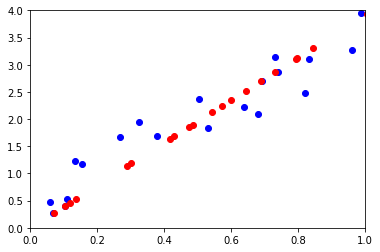

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(M[0,:], M[1,:], "ob")
ax.plot(wh[0,:], wh[1,:], "or")
ax.set_xlim([0,1])
ax.set_ylim([0,4])

## ACP : analyse en composantes principales

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(M.T)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
projected_points = pca.inverse_transform(pca.transform(M.T))
pj = projected_points.T

(0, 4)

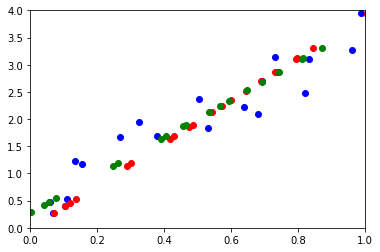

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(M[0,:], M[1,:], "ob")
ax.plot(wh[0,:], wh[1,:], "or")
ax.plot(pj[0,:], pj[1,:], "og")
ax.set_xlim([0,1])
ax.set_ylim([0,4])

Les résultats ne sont pas exactement identiques car l'[ACP](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) centre le nuage de points par défaut. On utilise celui
 de [statsmodels](http://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html) pour éviter cela.

In [11]:
from statsmodels.multivariate.pca import PCA
pca = PCA(M.T, ncomp=1, standardize=False, demean=False, normalize=False)
pca

Principal Component Analysis(nobs: 20, nvar: 2, transformation: None, normalization: False, number of components: 1, SVD, id: 0x1c01a2861d0)

In [12]:
pj2 = pca.projection.T

(0, 4)

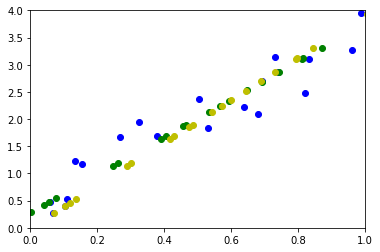

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(M[0,:], M[1,:], "ob")
#ax.plot(wh[0,:], wh[1,:], "or")
ax.plot(pj[0,:], pj[1,:], "og")
ax.plot(pj2[0,:], pj2[1,:], "oy")
ax.set_xlim([0,1])
ax.set_ylim([0,4])

On retrouve exactement les mêmes résultats.